In [2]:
import json
import cv2
from PIL import Image
from matplotlib import pyplot
import os
from tqdm import tqdm

In [3]:
image_name = "00048_00"

img_pose = cv2.imread(f"./zalando-hd-resized/train/openpose_img/{image_name}_rendered.png")[:,:,::-1]
with open(f"./zalando-hd-resized/train/openpose_json/{image_name}_keypoints.json", "r") as f:
    img_pose_json = json.load(f)

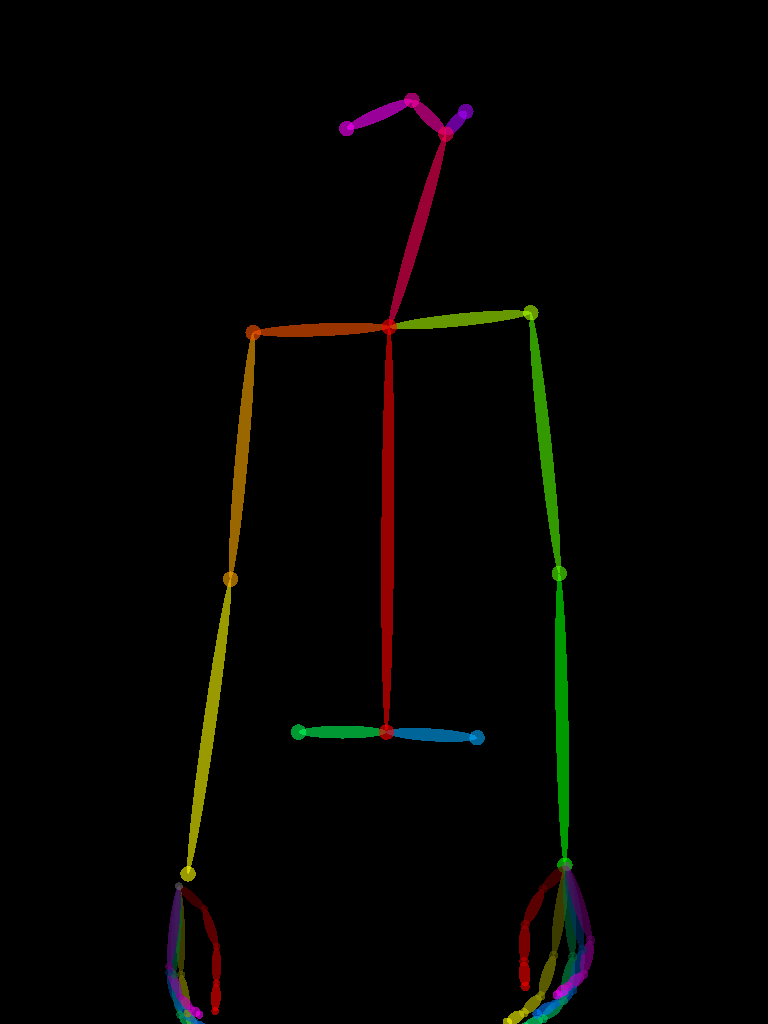

In [4]:
Image.fromarray(img_pose)

In [5]:
x_coordinates = []
y_coordinates = []
alpha = []

for i in range(0, len(img_pose_json["people"][0]["pose_keypoints_2d"]), 3):
    x_coordinates.append(img_pose_json["people"][0]["pose_keypoints_2d"][i])

for i in range(1, len(img_pose_json["people"][0]["pose_keypoints_2d"]), 3):
    y_coordinates.append(img_pose_json["people"][0]["pose_keypoints_2d"][i])

for i in range(2, len(img_pose_json["people"][0]["pose_keypoints_2d"]), 3):
    alpha.append(img_pose_json["people"][0]["pose_keypoints_2d"][i])

In [6]:
x_coordinates

[445.352,
 388.751,
 252.647,
 230.015,
 187.548,
 530.341,
 558.722,
 564.416,
 385.852,
 298.015,
 0,
 0,
 476.585,
 0,
 0,
 411.391,
 465.362,
 346.139,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [7]:
y_coordinates

[133.657,
 326.465,
 332.159,
 578.642,
 873.34,
 312.281,
 572.961,
 864.744,
 731.601,
 731.61,
 0,
 0,
 737.257,
 0,
 0,
 99.6869,
 111.044,
 128.095,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [8]:
img_pose.shape

(1024, 768, 3)

### Data Verification

In [9]:
folder_path = "./zalando-hd-resized/test/openpose_json/"
json_directory = os.listdir(folder_path)
files_path = [os.path.join(folder_path, i) for i in json_directory]

In [10]:
set([bool(i.split(".")[-1]=="json") for i in files_path])

{True}

In [11]:
def load_json(json_file_path):
    with open(json_file_path, "r") as f:
        img_pose_json = json.load(f)
    return img_pose_json

In [75]:
# similarly created train data, write it into the function if you want!
# it removes the files with more than 1 pose, since all images in the dataset contains just one person.

for file_path in tqdm(files_path):
    dct = load_json(file_path)
    assert "people" in dct
    if len(dct["people"])!=1:
        print(file_path)
    else:
        with open("./data/test_data.txt", "a") as f:
            f.write(file_path.split("/")[-1][:8]+"\n")
    assert "pose_keypoints_2d" in dct["people"][0]
    assert len(dct["people"][0]["pose_keypoints_2d"])==75

 41%|███████████████▌                      | 831/2032 [00:00<00:00, 4193.29it/s]

./zalando-hd-resized/test/openpose_json/03032_00_keypoints.json
./zalando-hd-resized/test/openpose_json/01969_00_keypoints.json
./zalando-hd-resized/test/openpose_json/07072_00_keypoints.json


100%|█████████████████████████████████████| 2032/2032 [00:00<00:00, 4413.11it/s]

./zalando-hd-resized/test/openpose_json/01248_00_keypoints.json


### Final Data Prep

In [79]:
train_folder_path = "./zalando-hd-resized/train/openpose_json/"

In [80]:
test_folder_path = "./zalando-hd-resized/test/openpose_json/"

In [84]:
with open("./data/train_data.txt", "r") as f:
    lst_train = f.read().split("\n")
with open("./data/test_data.txt", "r") as f:
    lst_test = f.read().split("\n")

In [90]:
def create_data(lst_files, folder_path, save_path):
    files = os.listdir(folder_path)
    for file in lst_files:
        file_name = f"{file}_keypoints.json"
        file_path = os.path.join(folder_path, file_name)
        if file_name in files:
            dct = load_json(file_path)
            lst = dct["people"][0]["pose_keypoints_2d"]
            del lst[2::3]
            with open(os.path.join(save_path, file_name), "w") as f:
                json.dump(lst, f)

In [91]:
create_data(lst_test, test_folder_path, "./data/test/")

In [92]:
create_data(lst_train, train_folder_path, "./data/train/")